Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



Ans)
$$
\text{There are } n \times m \text{ such elements in the resulting matrix.}
$$

$$
\text{Total multiplications: } n \times m \times k
$$

$$
\text{Total additions: } n \times m \times (k - 1)
$$


Q2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import numpy as np
import time

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [7,8],
    [9,10],
    [11,12]
]

def matrix_mul(A,B):
    n = len(A);
    k= len(A[0]);
    m = len(B[0]);
    C = []
    for _ in range(n):
        row = [0] * m
        C.append(row)
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l]*B[l][j]
    return C


initial = time.perf_counter()
C_list = matrix_mul(A, B)
end = time.perf_counter()
for row in C_list:
    print(row)
print("Time:", end - initial)


#USING NUMPY

A_np = np.array(A)
B_np = np.array(B)

start = time.perf_counter()
C_np = np.dot(A_np, B_np)
end = time.perf_counter()
print("\nNumPy Result:")
print(C_np)
print("Time:", end - start)

[58, 64]
[139, 154]
Time: 6.189997657202184e-05

NumPy Result:
[[ 58  64]
 [139 154]]
Time: 0.0007143999973777682


Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [2]:
import numpy as np
import random
import time

# 1st method (O(n^2))

def median_remove_max(arr):
    temp = arr.copy()
    n = len(temp)

    for _ in range(n // 2):
        temp.remove(max(temp))
    if n % 2 == 1:
        return max(temp)
    else:
        m1 = max(temp)
        temp.remove(m1)
        m2 = max(temp)
        return (m1 + m2) / 2

# 2. method O(n log n)

def median_sort(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    mid = n // 2
    if n % 2 == 1:
        return sorted_arr[mid]
    else:
        return (sorted_arr[mid - 1] + sorted_arr[mid]) / 2

# Values

n = 5000
data = [random.randint(0, 100000) for _ in range(n)]

start = time.time()
median1 = median_remove_max(data)
t1 = time.time() - start

start = time.time()
median2 = median_sort(data)
t2 = time.time() - start

start = time.time()
median3 = np.median(data)
t3 = time.time() - start

print(f"Remove-Max Median:       {median1}, Time: {t1:.6f} sec")
print(f"Sorting Median:          {median2}, Time: {t2:.6f} sec")
print(f"NumPy Median:            {median3}, Time: {t3:.6f} sec")


Remove-Max Median:       51524.5, Time: 0.223865 sec
Sorting Median:          51535.5, Time: 0.000853 sec
NumPy Median:            51535.5, Time: 0.004467 sec


Q4) What is the gradient of the following function with respect to x and y?
$$
f(x, y) = x^2 y + y^3 \sin(x)
$$





Ans) Gradient means partial derivative of the function.

$$
\\Gradient f(x, y)=  [2xy + y^3 cos(x), x^2 + 3y^2 sin(x) ]
$$


Q5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [5]:
# Analytically Calculated value


x1, y1 = 1, 2
x2, y2 = 3, 4

df_dx1 = 2 * x1 * y1 + y1**3 * np.cos(x1)
df_dx2 = 2 * x2 * y2 + y2**3 * np.cos(x2)

print(df_dx1, df_dx2)


8.322418446945118 -39.35951978242851


In [4]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
f_x = jax.grad(lambda x, y: f(x, y), argnums=0)
f_y = jax.grad(lambda x, y: f(x, y), argnums=1)

x, y = 1.0, 2.0
grad_x = f_x(x, y)
grad_y = f_y(x, y)

x1, y1 = 4.0, 3.0
grad_x1 = f_x(x1, y1)
grad_y1 = f_y(x1, y1)

print(f"Gradient for x at (x={x}, y={y}): {grad_x}")
print(f"Gradient for y at (x={x}, y={y}): {grad_y}")

print(f"Gradient for x1 at (x={x1}, y={y1}): {grad_x1}")
print(f"Gradient for y1 at (x={x1}, y={y1}): {grad_y1}")

Gradient for x at (x=1.0, y=2.0): 8.322418212890625
Gradient for y at (x=1.0, y=2.0): 11.097651481628418
Gradient for x1 at (x=4.0, y=3.0): 6.35162353515625
Gradient for y1 at (x=4.0, y=3.0): -4.43366813659668


In [6]:
import sympy as sp

x,y = sp.symbols('x y')

f= ((x**2) * y) + (y**3) * sp.sin(x)

dev_x= sp.diff(f,x)
dev_y= sp.diff(f,y)
gradient = (dev_x, dev_y)
print("the gradient function is:", gradient)

grad_point1 = (dev_x.subs({x: 1, y: 2}), dev_y.subs({x: 1, y: 2}))
grad_point2 = (dev_x.subs({x: 4, y: 3}), dev_y.subs({x: 4, y: 3}))
grad_num1 = (sp.N(grad_point1[0]), sp.N(grad_point1[1]))
grad_num2 = (sp.N(grad_point2[0]), sp.N(grad_point2[1]))

print("Gradient at (x=1, y=2):", grad_num1)
print("Gradient at (x=3, y=4):", grad_num2)

the gradient function is: (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))
Gradient at (x=1, y=2): (8.32241844694512, 11.0976518176948)
Gradient at (x=3, y=4): (6.35162223668248, -4.43366737331406)


Q7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
students_db = {
    2022: {
        "Computer Science": {
            1: {"Roll": 1, "Name": "Arjun", "Marks": {"Maths": 95, "CN": 88}},
            2: {"Roll": 2, "Name": "Jassi", "Marks": {"Maths": 78, "CN": 92}},
        }
    },
    2023: {
        "Electrical": {
            1: {"Roll": 3, "Name": "Ritesh", "Marks": {"BEE": 100, "Power": 85}},
        }
    }
}

print(students_db[2022]["Computer Science"][1]["Name"])
print(students_db[2023]["Electrical"][1]["Marks"]["BEE"])


Arjun
100


In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []


y2022 = Year(2022)

cs_2022 = Branch("Computer Science")
cs_2022.students.append(Student(1, "Arjun", {"Maths": 95, "CN": 88}))

ee_2022 = Branch("Electrical")
ee_2022.students.append(Student(1, "Ritesh", {"BEE": 100, "Power": 85}))

y2022.branches.extend([cs_2022, ee_2022])

database = [y2022]

# Prints
print(database[0].branches[0].students[0].name)
print(database[0].branches[0].students[0].marks["Maths"])
print(database[0].branches[1].students[0].name)
print(database[0].branches[1].students[0].marks["BEE"])


Arjun
95
Ritesh
100


Q9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

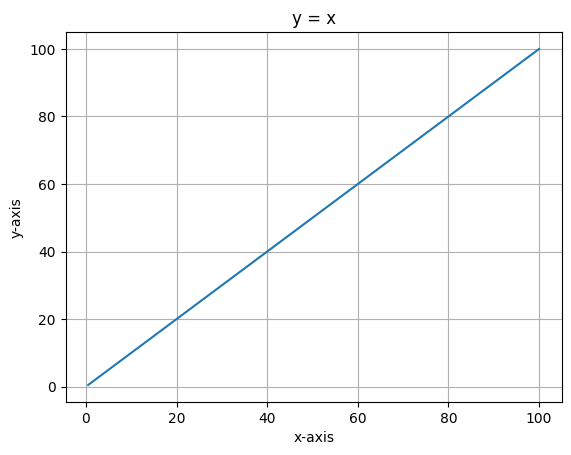

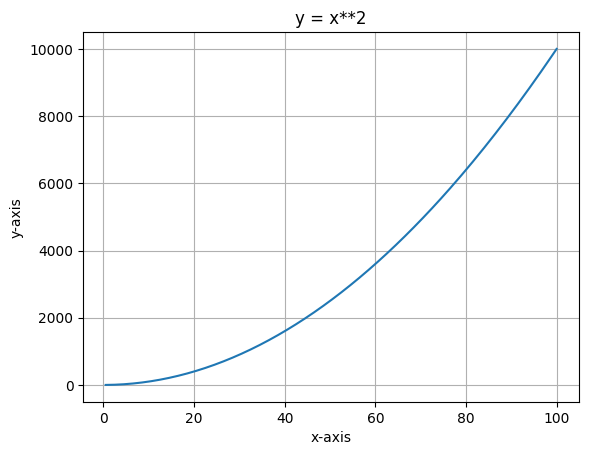

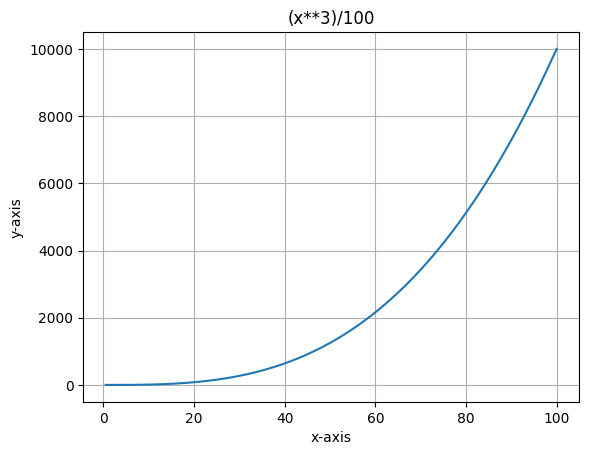

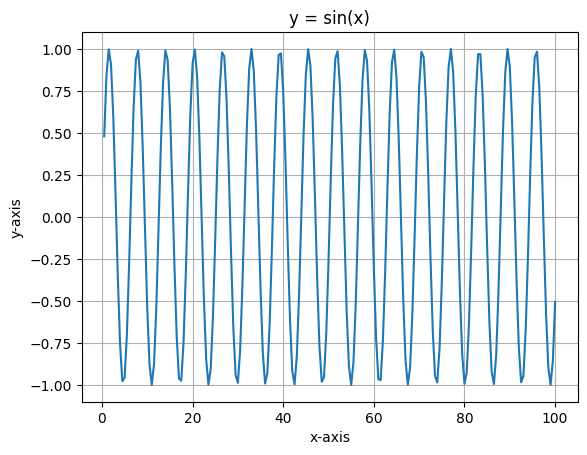

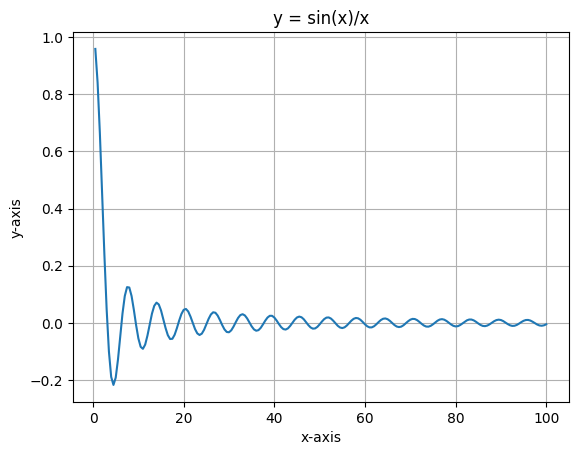

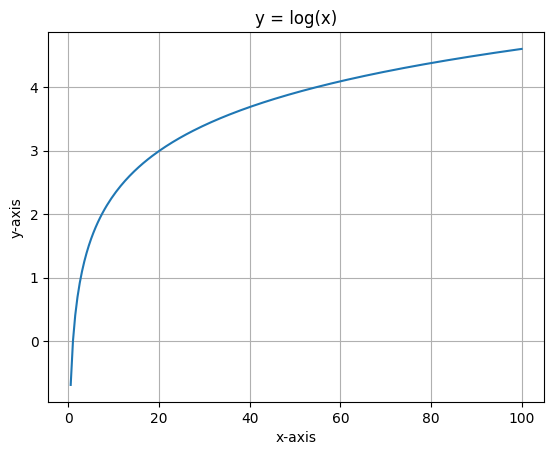

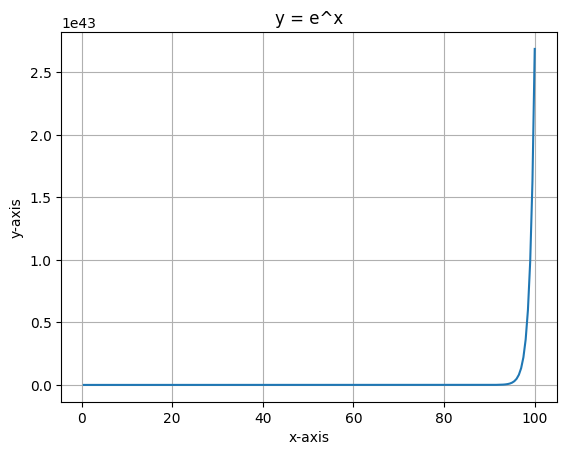

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0.5, 100.5, 0.5)
def plotting(y,eq):
    x= np.arange(0.5, 100.5, 0.5)
    plt.title(eq)
    plt.plot(x,y)
    plt.ylabel('y-axis')
    plt.xlabel('x-axis')
    plt.grid(True)
    plt.show()

y1 = x
eq1 ='y = x'
y2= x**2
eq2 ='y = x**2'
y3 = (x**3)/100
eq3 = '(x**3)/100'
y4 = np.sin(x)
eq4 = 'y = sin(x)'
y5 = np.sin(x)/x
eq5 = 'y = sin(x)/x'
y6 = np.log(x)
eq6 = 'y = log(x)'
y7 = np.exp(x)
eq7 = 'y = e^x'
plotting(y1,eq1)
plotting(y2,eq2)
plotting(y3,eq3)
plotting(y4,eq4)
plotting(y5,eq5)
plotting(y6,eq6)
plotting(y7,eq7)

Q10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
col_max_std = df.std().idxmax()
row_min_mean = df.mean(axis=1).idxmin()

print("DataFrame:\n", df)
print("\nColumn with highest standard deviation:", col_max_std)
print("Row index with lowest mean:", row_min_mean)


DataFrame:
            a         b         c         d         e
0   1.354624  1.746046  1.269082  1.525765  1.305781
1   1.156087  1.108857  1.695002  1.889109  1.861691
2   1.288367  1.585886  1.036892  1.673822  1.940079
3   1.655144  1.035640  1.759953  1.550267  1.033026
4   1.725327  1.313569  1.720428  1.940784  1.026399
5   1.658721  1.567254  1.700011  1.352534  1.141746
6   1.358538  1.414735  1.004790  1.109883  1.210748
7   1.250484  1.740044  1.011565  1.081801  1.197589
8   1.754243  1.298072  1.961783  1.384354  1.653404
9   1.165685  1.413245  1.053338  1.190818  1.001831
10  1.934573  1.166331  1.864580  1.628765  1.176269
11  1.395260  1.844244  1.843755  1.350109  1.762271
12  1.853206  1.081067  1.670345  1.428235  1.274873
13  1.625624  1.976843  1.090743  1.001310  1.938560
14  1.252616  1.507751  1.466956  1.265361  1.456402
15  1.866256  1.818108  1.621370  1.150645  1.167214
16  1.353175  1.789039  1.482623  1.738125  1.956892
17  1.013092  1.779714  1.017087  

Q11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
df["f"] = df["a"]+df["b"]+df["c"]+df["d"]+df["e"]
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

lt8_count = (df["g"] == "LT8").sum()
lt8_std = df[df["g"] == "LT8"]["f"].std()
gt8_std = df[df["g"] == "GT8"]["f"].std()

print("DataFrame:\n", df)
print("\nNumber of rows where g = LT8:", lt8_count)
print("Std deviation of f for LT8 rows:", lt8_std)
print("Std deviation of f for GT8 rows:", gt8_std)


DataFrame:
            a         b         c         d         e         f    g
0   1.354624  1.746046  1.269082  1.525765  1.305781  7.201298  LT8
1   1.156087  1.108857  1.695002  1.889109  1.861691  7.710746  LT8
2   1.288367  1.585886  1.036892  1.673822  1.940079  7.525046  LT8
3   1.655144  1.035640  1.759953  1.550267  1.033026  7.034029  LT8
4   1.725327  1.313569  1.720428  1.940784  1.026399  7.726508  LT8
5   1.658721  1.567254  1.700011  1.352534  1.141746  7.420266  LT8
6   1.358538  1.414735  1.004790  1.109883  1.210748  6.098695  LT8
7   1.250484  1.740044  1.011565  1.081801  1.197589  6.281482  LT8
8   1.754243  1.298072  1.961783  1.384354  1.653404  8.051856  GT8
9   1.165685  1.413245  1.053338  1.190818  1.001831  5.824919  LT8
10  1.934573  1.166331  1.864580  1.628765  1.176269  7.770518  LT8
11  1.395260  1.844244  1.843755  1.350109  1.762271  8.195638  GT8
12  1.853206  1.081067  1.670345  1.428235  1.274873  7.307726  LT8
13  1.625624  1.976843  1.090743  1.

Q12) Write a small piece of code to explain broadcasting in numpy.

In [ ]:
A = np.array([1, 2, 3])
B = np.array([[10],
              [20],
              [30]])

print("A shape:", A.shape)
print("B shape:", B.shape)

C = A + B

print( "Result",C)
print("C shape:", C.shape)

A shape: (3,)
B shape: (3, 1)
Result [[11 12 13]
 [21 22 23]
 [31 32 33]]
C shape: (3, 3)


Q13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
arr = np.array([3, 1, 4, 0, 2])

min_idx = 0
for i in range(1, len(arr)):
    if arr[i] < arr[min_idx]:
        min_idx = i

print(min_idx)
print(np.argmin(arr))

3
3
